#Preprocessing

In [ ]:
! pip install transformers
from transformers import TextClassificationPipeline, AutoModelForSequenceClassification, AutoTokenizer


labeling_model_name = "CryptologistOfficial/labeling_model_v3"
labeling_tokenizer = AutoTokenizer.from_pretrained(labeling_model_name, use_fast = True, use_auth_token = CREDENTIALS)
labeling_model = AutoModelForSequenceClassification.from_pretrained(labeling_model_name, use_auth_token = CREDENTIALS)
labeling_pipe = TextClassificationPipeline(
  model = labeling_model, 
  tokenizer = labeling_tokenizer, 
  max_length = 512, 
  truncation = True, 
  padding = 'max_length', 
  device = 0
)


labeling_translator = {
  "LABEL_0": "Bugs/Defects/Scam",
  "LABEL_1": "Feature Release",
  "LABEL_2": "Marketing",
  "LABEL_3": "Other",
  "LABEL_4": "Partnership/Investment"
}



In [ ]:
import pandas as pd
tweets = pd.read_excel('/content/drive/MyDrive/Chapman PhD/CS799/Regression/Decentraland/mana (1).xlsx')
tweets.drop(columns = 'Unnamed: 0', inplace = True)
tweets.head(10)

In [ ]:
# creating a df to save data and labeling:

df= pd.DataFrame()
df['date'] = ''
df['tweet_lable'] = ''
df

,date,tweet_lable


In [ ]:
i = 0
while i < len(tweets):
  tweet = tweets['text'].iloc[i]
  lable = labeling_translator[labeling_pipe(tweets['text'].iloc[i])[0]['label']]
  #score = labeling_pipe(ftx_tweets['tweets'].iloc[i])[0]['score']
  date = tweets['created_at'].iloc[i]
  df.loc[len(df.index)] = [date,lable] 
  i = i+1

df

/usr/local/lib/python3.8/dist-packages/transformers/pipelines/base.py:1043: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


,date,tweet_lable
0,2022-11-13 17:14:58,Marketing
1,2022-11-13 16:29:58,Other
2,2022-11-13 16:15:00,Other
3,2022-11-13 15:52:29,Marketing
4,2022-11-13 15:52:28,Bugs/Defects/Scam
...,...,...
1293,2021-02-20 23:44:30,Other
1294,2021-02-20 22:33:00,Other
1295,2021-02-20 22:00:40,Marketing
1296,2021-02-20 20:00:16,Marketing


In [ ]:
df['tweet_lable'].value_counts()

Other                     625
Marketing                 537
Feature Release            74
Partnership/Investment     37
Bugs/Defects/Scam          25
Name: tweet_lable, dtype: int64

In [ ]:
#get dummies:

def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]], drop_first=False)
    res = pd.concat([original_dataframe, dummies], axis=1)
    return(res)

df_encoded = encode_and_bind(df, 'tweet_lable')

df_encoded

,date,tweet_lable,tweet_lable_Bugs/Defects/Scam,tweet_lable_Feature Release,tweet_lable_Marketing,tweet_lable_Other,tweet_lable_Partnership/Investment
0,2022-11-13 17:14:58,Marketing,0,0,1,0,0
1,2022-11-13 16:29:58,Other,0,0,0,1,0
2,2022-11-13 16:15:00,Other,0,0,0,1,0
3,2022-11-13 15:52:29,Marketing,0,0,1,0,0
4,2022-11-13 15:52:28,Bugs/Defects/Scam,1,0,0,0,0
...,...,...,...,...,...,...,...
1293,2021-02-20 23:44:30,Other,0,0,0,1,0
1294,2021-02-20 22:33:00,Other,0,0,0,1,0
1295,2021-02-20 22:00:40,Marketing,0,0,1,0,0
1296,2021-02-20 20:00:16,Marketing,0,0,1,0,0


In [ ]:
# filling missing dates and grouping by date:

df_encoded = df_encoded.groupby(pd.Grouper(key='date', axis=0, 
                      freq='D')).sum()

df_encoded

,tweet_lable_Bugs/Defects/Scam,tweet_lable_Feature Release,tweet_lable_Marketing,tweet_lable_Other,tweet_lable_Partnership/Investment
date,,,,,
2021-02-20,0,0,2,3,0
2021-02-21,0,0,0,0,0
2021-02-22,0,0,0,0,0
2021-02-23,0,0,0,0,0
2021-02-24,0,0,0,0,0
...,...,...,...,...,...
2022-11-09,0,1,9,10,1
2022-11-10,3,1,16,24,0
2022-11-11,0,0,14,15,0


## Addning Prices

In [ ]:

! pip install yfinance
import yfinance as yf

coin = yf.Ticker("MANA-USD")
price_data = coin.history(start="2021-02-20", end="2022-11-13", interval="1d")
price_data.reset_index(inplace =True)
price_data = price_data[['Date', 'Open', 'Close']]
price_data['Date'] = pd.to_datetime(price_data['Date']).dt.date
price_data['Date'] = pd.to_datetime(price_data['Date'])
price_data.sort_values(by='Date')
price_data.reset_index(inplace =True, drop = True)
price_data

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


,Date,Open,Close
0,2021-02-20,0.328937,0.303368
1,2021-02-21,0.303316,0.313663
2,2021-02-22,0.313636,0.271888
3,2021-02-23,0.271988,0.233384
4,2021-02-24,0.233350,0.247976
...,...,...,...
626,2022-11-08,0.663755,0.565640
627,2022-11-09,0.565849,0.459954
628,2022-11-10,0.460088,0.531651
629,2022-11-11,0.531540,0.495795


In [ ]:
# removing extra dates in tweets dataframe:


df_encoded.drop(df_encoded.tail(len(df_encoded) - len(price_data)).index, inplace = True)
df_encoded

,tweet_lable_Bugs/Defects/Scam,tweet_lable_Feature Release,tweet_lable_Marketing,tweet_lable_Other,tweet_lable_Partnership/Investment
date,,,,,
2021-02-20,0,0,2,3,0
2021-02-21,0,0,0,0,0
2021-02-22,0,0,0,0,0
2021-02-23,0,0,0,0,0
2021-02-24,0,0,0,0,0
...,...,...,...,...,...
2022-11-08,0,0,3,15,0
2022-11-09,0,1,9,10,1
2022-11-10,3,1,16,24,0


## Adding prices to the tweets dataframe

In [ ]:
# adding prices to df_encoded:

# first, we need to make Date index in eth_price:
price_data.set_index('Date', inplace = True)
extracted_cols = price_data[["Open", 'Close']]

df_encoded = df_encoded.join(extracted_cols)
df_encoded

,tweet_lable_Bugs/Defects/Scam,tweet_lable_Feature Release,tweet_lable_Marketing,tweet_lable_Other,tweet_lable_Partnership/Investment,Open,Close
date,,,,,,,
2021-02-20,0,0,2,3,0,0.328937,0.303368
2021-02-21,0,0,0,0,0,0.303316,0.313663
2021-02-22,0,0,0,0,0,0.313636,0.271888
2021-02-23,0,0,0,0,0,0.271988,0.233384
2021-02-24,0,0,0,0,0,0.233350,0.247976
...,...,...,...,...,...,...,...
2022-11-08,0,0,3,15,0,0.663755,0.565640
2022-11-09,0,1,9,10,1,0.565849,0.459954
2022-11-10,3,1,16,24,0,0.460088,0.531651


# Regression Analysis

## Close (t) - Open(t)

### Non-binary

In [ ]:
df =  df_encoded
df

,tweet_lable_Bugs/Defects/Scam,tweet_lable_Feature Release,tweet_lable_Marketing,tweet_lable_Other,tweet_lable_Partnership/Investment,Open,Close
date,,,,,,,
2021-02-20,0,0,2,3,0,0.328937,0.303368
2021-02-21,0,0,0,0,0,0.303316,0.313663
2021-02-22,0,0,0,0,0,0.313636,0.271888
2021-02-23,0,0,0,0,0,0.271988,0.233384
2021-02-24,0,0,0,0,0,0.233350,0.247976
...,...,...,...,...,...,...,...
2022-11-08,0,0,3,15,0,0.663755,0.565640
2022-11-09,0,1,9,10,1,0.565849,0.459954
2022-11-10,3,1,16,24,0,0.460088,0.531651


In [ ]:
df.max()

tweet_lable_Bugs/Defects/Scam          3.000000
tweet_lable_Feature Release            4.000000
tweet_lable_Marketing                 19.000000
tweet_lable_Other                     24.000000
tweet_lable_Partnership/Investment     4.000000
Open                                   5.199132
Close                                  5.479181
dtype: float64

In [ ]:
import numpy as np
(df!=0).mean()

tweet_lable_Bugs/Defects/Scam         0.030111
tweet_lable_Feature Release           0.099842
tweet_lable_Marketing                 0.400951
tweet_lable_Other                     0.320127
tweet_lable_Partnership/Investment    0.045959
Open                                  1.000000
Close                                 1.000000
dtype: float64

In [ ]:
df["change"] = ((df["Close"] - df['Open'])/df['Open'])*100
# we need to take care of Inf values:
# Changing option to consider infinite as nan
pd.set_option('mode.use_inf_as_na', True)

df.dropna(inplace= True)
df

,tweet_lable_Bugs/Defects/Scam,tweet_lable_Feature Release,tweet_lable_Marketing,tweet_lable_Other,tweet_lable_Partnership/Investment,Open,Close,change
date,,,,,,,,
2021-02-20,0,0,2,3,0,0.328937,0.303368,-7.773219
2021-02-21,0,0,0,0,0,0.303316,0.313663,3.411297
2021-02-22,0,0,0,0,0,0.313636,0.271888,-13.310977
2021-02-23,0,0,0,0,0,0.271988,0.233384,-14.193275
2021-02-24,0,0,0,0,0,0.233350,0.247976,6.267843
...,...,...,...,...,...,...,...,...
2022-11-08,0,0,3,15,0,0.663755,0.565640,-14.781814
2022-11-09,0,1,9,10,1,0.565849,0.459954,-18.714359
2022-11-10,3,1,16,24,0,0.460088,0.531651,15.554199


In [ ]:
df.to_excel('MANA_nonbinary_close(t).xlsx')

In [ ]:
# train test split:

from sklearn.model_selection import TimeSeriesSplit
test_size = 100
tss = TimeSeriesSplit(n_splits = 2, test_size= test_size)

# setting the index to be date:
#df.set_index('date', inplace=True)
df.sort_index(inplace=True)


In [ ]:
X = df.drop(labels=['Close', 'Open', 'change'], axis=1)
y = df['change']

for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

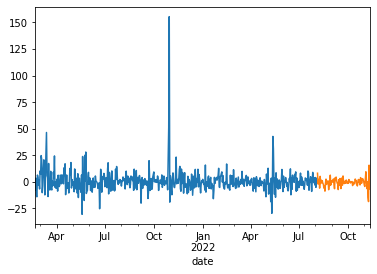

In [ ]:
# ploting train and test prices:

def price2num(x):
    if type(x) == str: 
        x = x.strip('$').replace(',', '')
    return float(x)
#function to convert price from string to floats
y_train=y_train.apply(price2num)
y_train.groupby('date').mean().plot()
y_test=y_test.apply(price2num)
y_test.groupby('date').mean().plot()

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats



X_train_plus_constant = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train_plus_constant).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                 change   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     12.21
Date:                Sun, 27 Nov 2022   Prob (F-statistic):           3.30e-11
Time:                        05:12:41   Log-Likelihood:                -1983.9
No. Observations:                 531   AIC:                             3980.
Df Residuals:                     525   BIC:                             4006.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


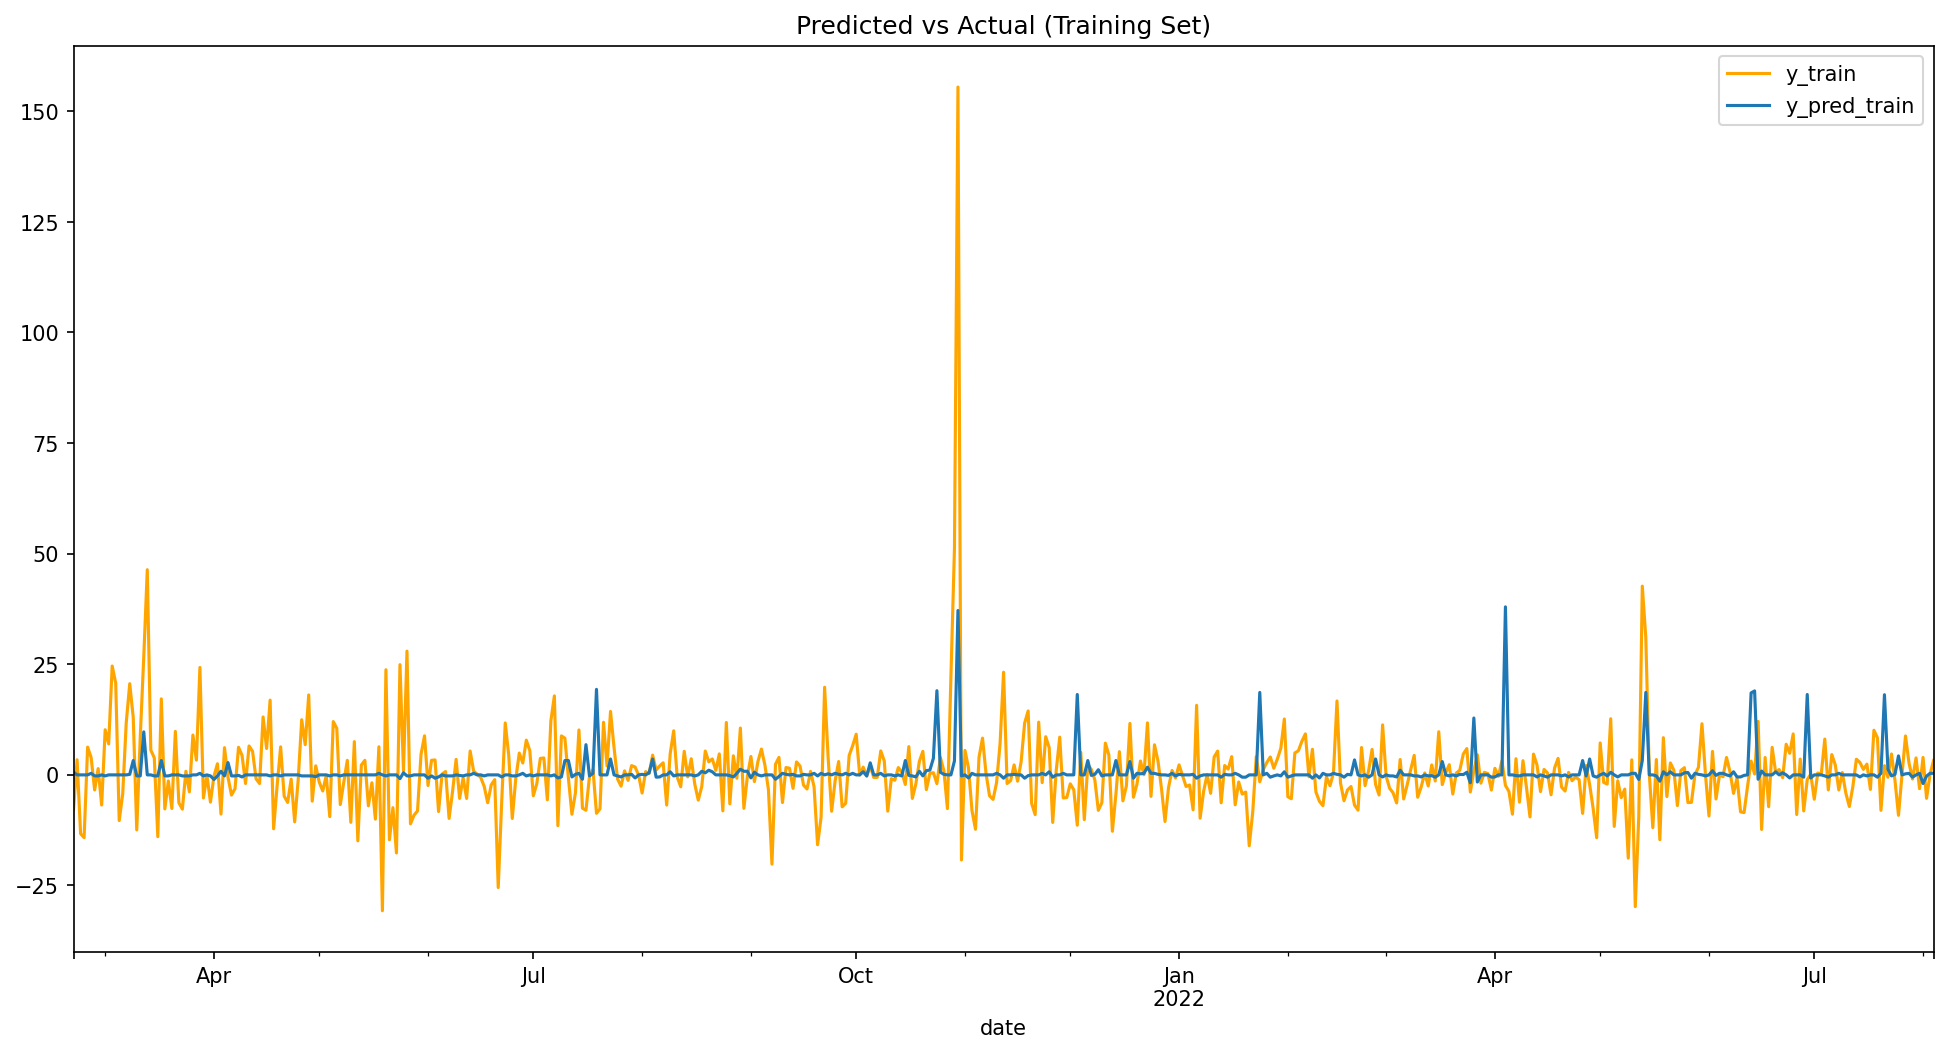

In [ ]:
# prediction for training set:
ypred_train = est.predict(X_train_plus_constant)

# making a df from ytrain and ytrain_pred to ease plotting:

y_train_df = y_train.to_frame('y_train')
y_train_df['y_pred'] = ypred_train.values

# ploting the training set:

import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8), dpi=150)
  
y_train_df['y_train'].plot(label='y_train', color='orange')
y_train_df['y_pred'].plot(label='y_pred_train')
  
# adding title to the plot
plt.title('Predicted vs Actual (Training Set)')
  
# adding Label to the x-axis
#plt.xlabel('Index')
  
# adding legend to the curve
plt.legend()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


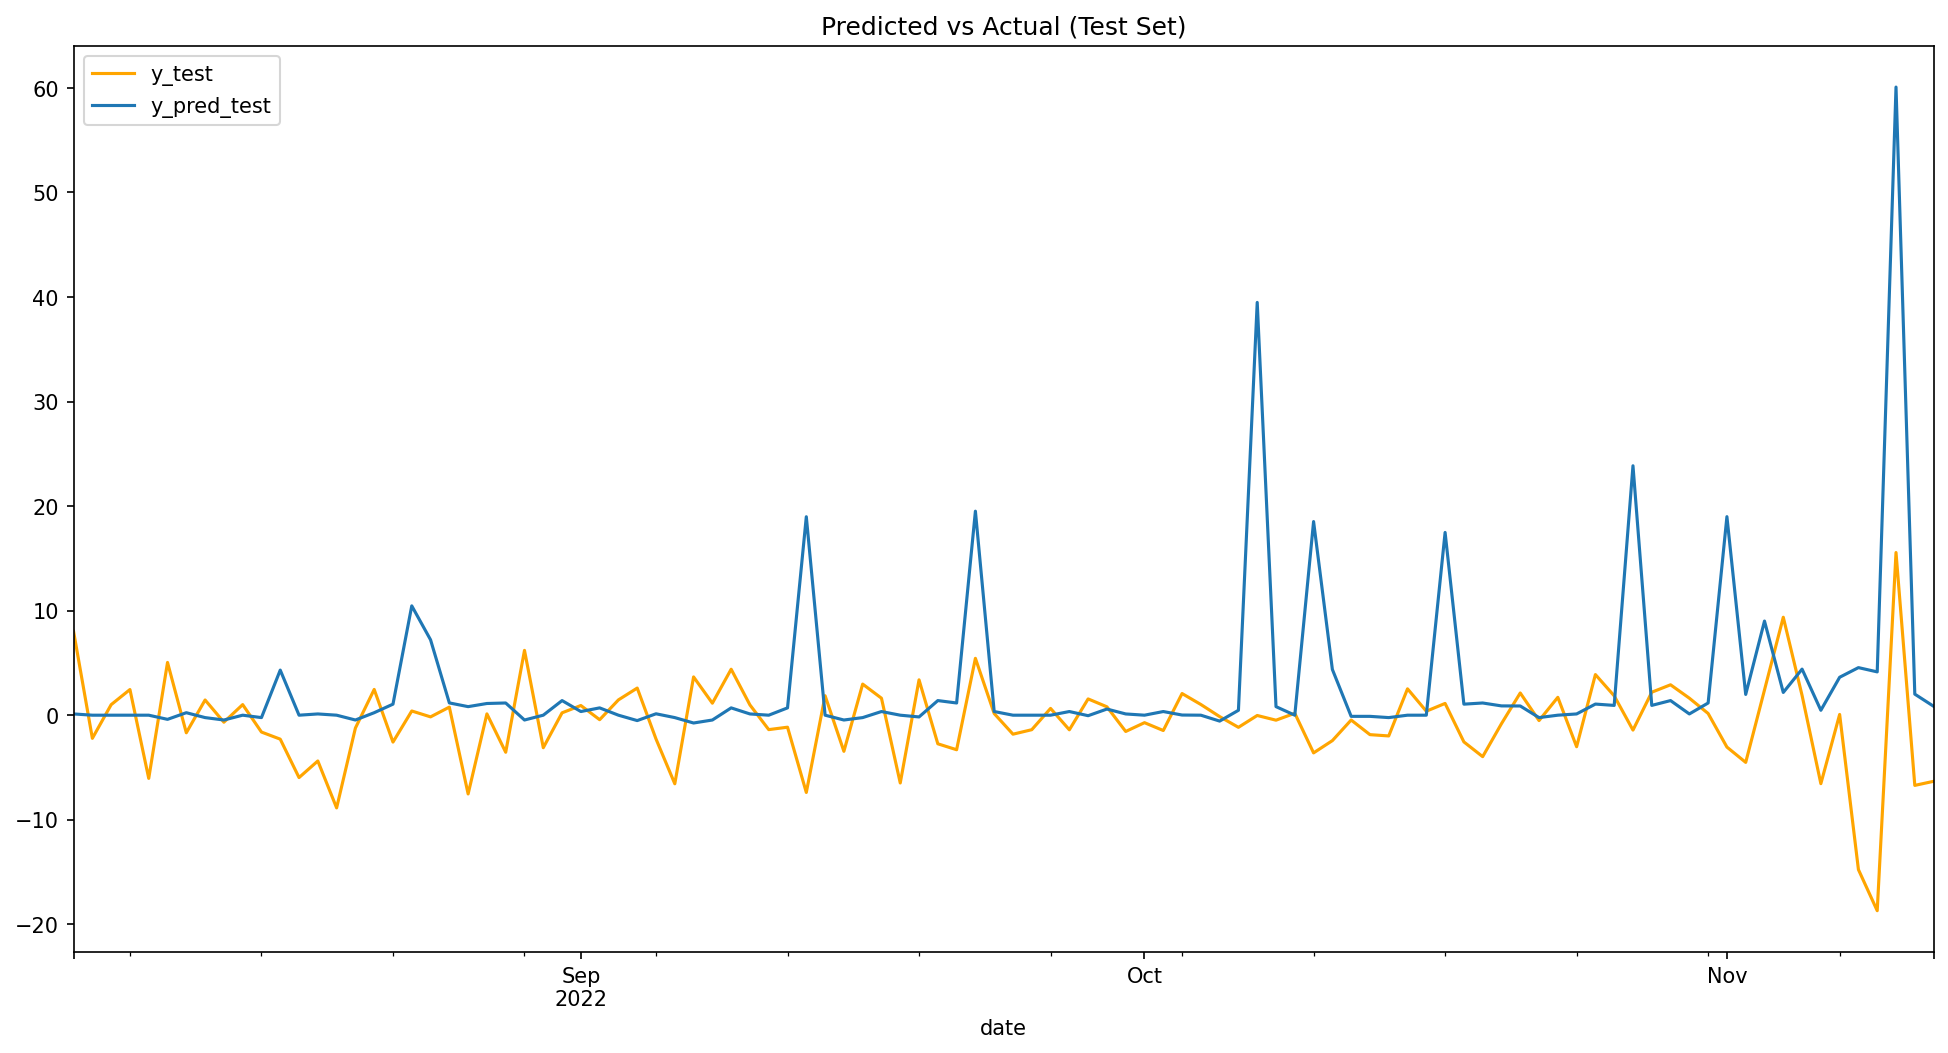

In [ ]:
# predition for test set:

X_test_plus_constant = sm.add_constant(X_test)

y_pred_test = est.predict(X_test_plus_constant)

# making a df from ytest and ytest_pred to ease plotting:

y_test_df = y_test.to_frame('y_test')
y_test_df['y_pred'] = y_pred_test.values

# ploting the test set:

import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8), dpi=150)
  
y_test_df['y_test'].plot(label='y_test', color='orange')
y_test_df['y_pred'].plot(label='y_pred_test')
  
# adding title to the plot
plt.title('Predicted vs Actual (Test Set)')
  
# adding Label to the x-axis
#plt.xlabel('Index')
  
# adding legend to the curve
plt.legend()

In [ ]:
# test set r-squared:

from sklearn.metrics import r2_score
test_r2 = r2_score(y_test, y_pred_test)
test_r2

-3.6248761658981463

### Binary

In [ ]:
df["tweet_lable_Other"].unique()

array([ 3,  0,  1,  2,  5, 10, 11, 14, 13,  4, 16,  6,  7, 12, 15, 24],
      dtype=uint8)

In [ ]:
# changing all variables bigger than 1 to 1:
df.replace(to_replace={'tweet_lable_Bugs/Defects/Scam': {2: 1, 3:1, 4:1},\
                       'tweet_lable_Feature Release': {2:1, 3:1, 4:1},
                       'tweet_lable_Marketing': {2:1, 11:1, 12:1, 19:1, 18:1, 13:1, 10:1, 9:1, 16:1, 14:1},
                       'tweet_lable_Partnership/Investment': {2: 1, 3:1, 4:1},
                       'tweet_lable_Other': {2:1, 3:1, 13:1, 4:1, 8:1, 5:1, 7:1, 9:1, 6:1, 10:1, 15:1, 16:1, 31:1, 14:1, 20:1, 24:1, 12:1, 11:1}},
                       value=None, inplace =True)

In [ ]:
df.max()

tweet_lable_Bugs/Defects/Scam           1.000000
tweet_lable_Feature Release             1.000000
tweet_lable_Marketing                   7.000000
tweet_lable_Other                       1.000000
tweet_lable_Partnership/Investment      1.000000
Open                                    5.199132
Close                                   5.479181
change                                155.477440
dtype: float64

In [ ]:
# train test split:

from sklearn.model_selection import TimeSeriesSplit
test_size = 100
tss = TimeSeriesSplit(n_splits = 2, test_size= test_size)

# setting the index to be date:
#df.set_index('date', inplace=True)
df.sort_index(inplace=True)


In [ ]:
X = df.drop(labels=['Close', 'Open', 'change'], axis=1)
y = df['change']

for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

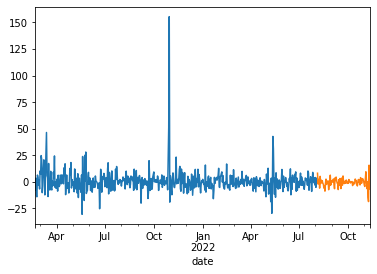

In [ ]:
# ploting train and test prices:

def price2num(x):
    if type(x) == str: 
        x = x.strip('$').replace(',', '')
    return float(x)
#function to convert price from string to floats
y_train=y_train.apply(price2num)
y_train.groupby('date').mean().plot()
y_test=y_test.apply(price2num)
y_test.groupby('date').mean().plot()

In [ ]:
X_train_plus_constant = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train_plus_constant).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                 change   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     5.781
Date:                Sun, 27 Nov 2022   Prob (F-statistic):           3.30e-05
Time:                        05:13:23   Log-Likelihood:                -1998.9
No. Observations:                 531   AIC:                             4010.
Df Residuals:                     525   BIC:                             4035.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


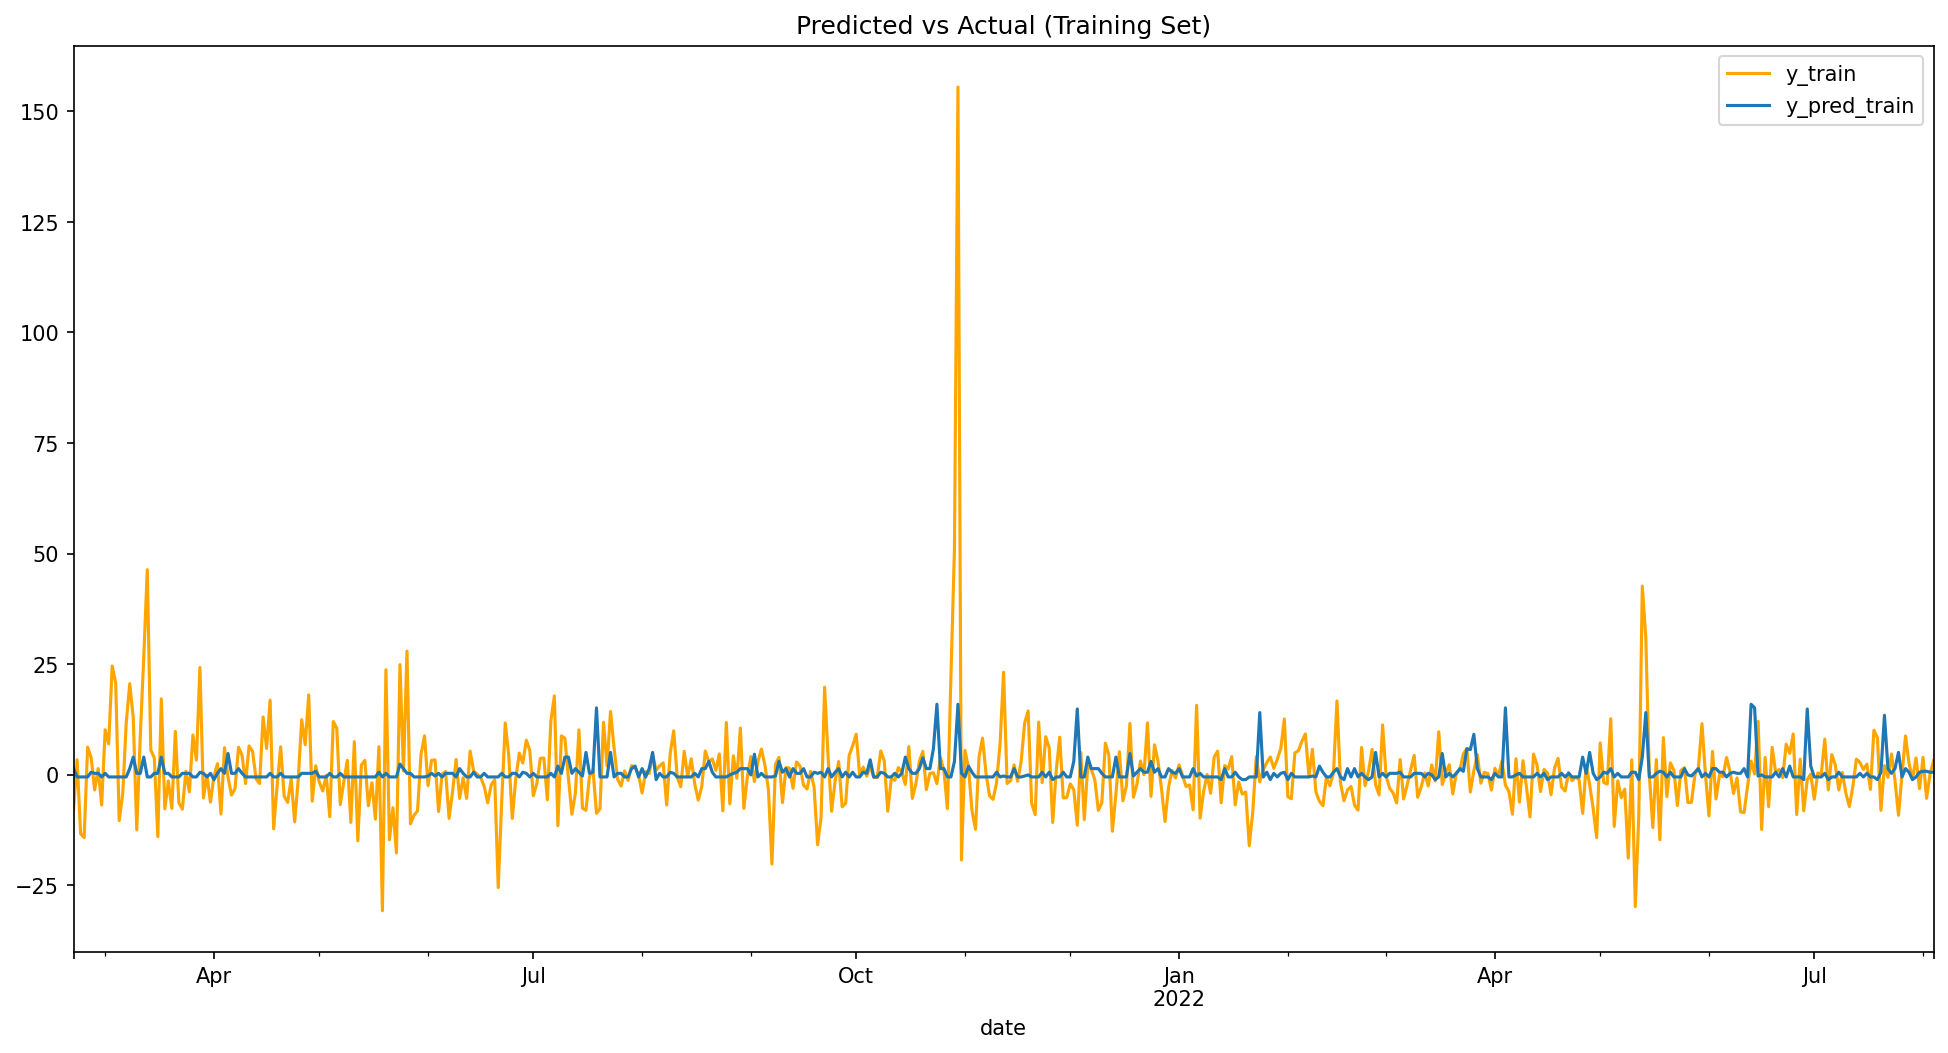

In [ ]:
# prediction for training set:
ypred_train = est.predict(X_train_plus_constant)

# making a df from ytrain and ytrain_pred to ease plotting:

y_train_df = y_train.to_frame('y_train')
y_train_df['y_pred'] = ypred_train.values

# ploting the training set:

import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8), dpi=150)
  
y_train_df['y_train'].plot(label='y_train', color='orange')
y_train_df['y_pred'].plot(label='y_pred_train')
  
# adding title to the plot
plt.title('Predicted vs Actual (Training Set)')
  
# adding Label to the x-axis
#plt.xlabel('Index')
  
# adding legend to the curve
plt.legend()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


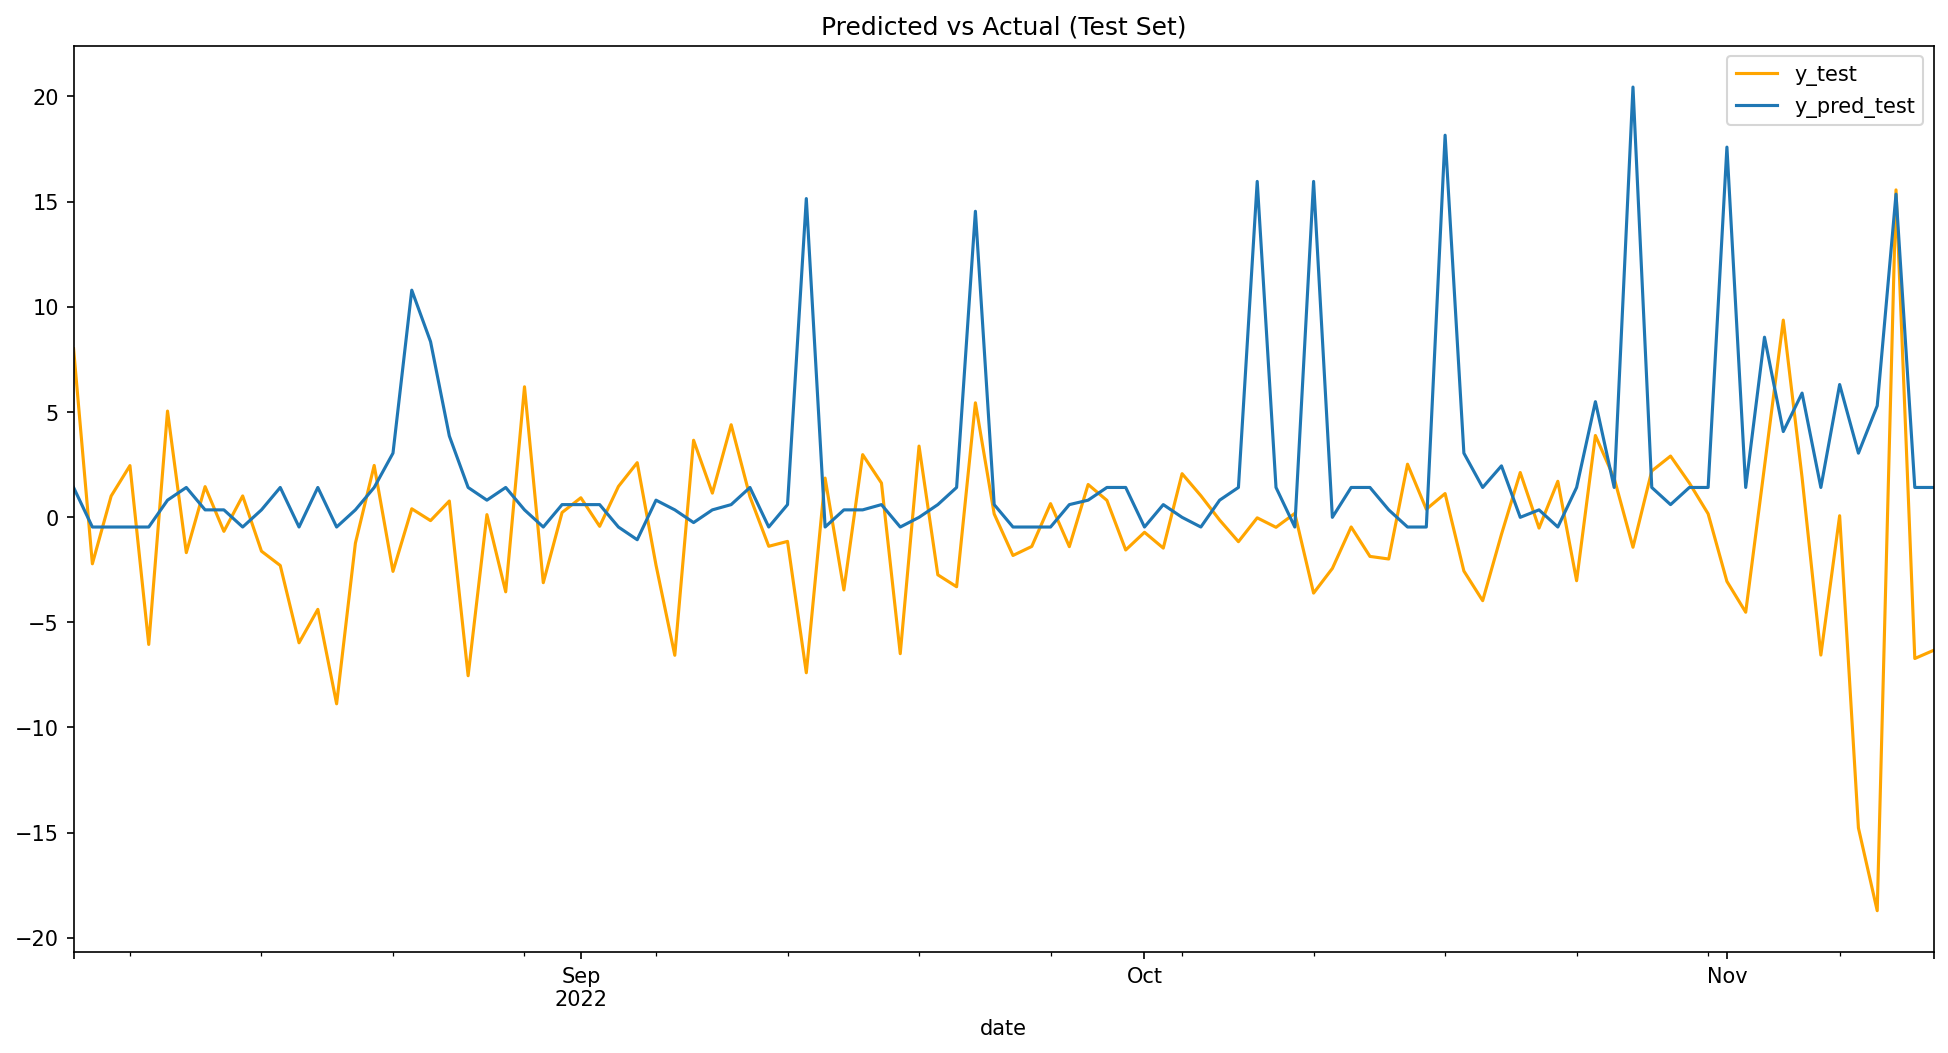

In [ ]:
# predition for test set:

X_test_plus_constant = sm.add_constant(X_test)

y_pred_test = est.predict(X_test_plus_constant)

# making a df from ytest and ytest_pred to ease plotting:

y_test_df = y_test.to_frame('y_test')
y_test_df['y_pred'] = y_pred_test.values

# ploting the test set:

import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8), dpi=150)
  
y_test_df['y_test'].plot(label='y_test', color='orange')
y_test_df['y_pred'].plot(label='y_pred_test')
  
# adding title to the plot
plt.title('Predicted vs Actual (Test Set)')
  
# adding Label to the x-axis
#plt.xlabel('Index')
  
# adding legend to the curve
plt.legend()

In [ ]:
# test set r-squared:

from sklearn.metrics import r2_score
test_r2 = r2_score(y_test, y_pred_test)
test_r2

-1.5414829045052523